**Data Manipulation**<br>
**Data Analysis**<br>
**Data Visualization**<br>
**Predictive Modeling**<br>

# Introduction to Pandas


* Series
* DataFrames
* Missing Data
* GroupBy
* Operations
* Data Input and Output

In [3]:
import numpy as np
import pandas as pd

# Series

A Pandas Series is a one-dimensional labeled array built on numpy arrays capable of holding any data type. Think of it as a single column of a spreadsheet or a NumPy array with a named index for each element. 

A python list, numpy array and a dictionary can be converted to a pandas Serie

In [6]:
labels = ['a','b','c']
list = [1,2,3]
arr = np.array([1,2,3])
dict = {'a':1,'b':2,'c':3}

In [7]:
pd.Series(list)

0    1
1    2
2    3
dtype: int64

In [8]:
pd.Series(data=list, index=labels)

a    1
b    2
c    3
dtype: int64

In [9]:
pd.Series(arr)

0    1
1    2
2    3
dtype: int32

In [10]:
pd.Series(arr, labels)

a    1
b    2
c    3
dtype: int32

In [11]:
pd.Series(dict)

a    1
b    2
c    3
dtype: int64

In [12]:
olymp_2020 = pd.Series([1, 2, 3, 4],index = ['USA', 'China','Japan', 'GBR'])   

In [13]:
olymp_2020

USA      1
China    2
Japan    3
GBR      4
dtype: int64

In [14]:
olymp_2020['USA']

1

# DataFrames
Pandas DataFrames are two-dimensional, labeled data structures with columns of potentially different types. Visualize them as spreadsheets or SQL tables, offering both row and column labels (indexes). DataFrames are the cornerstone of Pandas, providing a powerful and versatile way to organize, analyze, and manipulate tabular data.

In [16]:
df = pd.DataFrame(np.random.randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

In [17]:
df

,W,X,Y,Z
A,1.213585,-0.432209,1.318795,0.955401
B,-0.469481,0.947015,1.453565,-0.710018
C,0.602624,0.235295,-0.291815,0.491341
D,0.699801,-0.261070,0.986996,0.598705
E,0.841749,0.521286,0.920768,-1.472003


In [18]:
df.head()

,W,X,Y,Z
A,1.213585,-0.432209,1.318795,0.955401
B,-0.469481,0.947015,1.453565,-0.710018
C,0.602624,0.235295,-0.291815,0.491341
D,0.699801,-0.261070,0.986996,0.598705
E,0.841749,0.521286,0.920768,-1.472003


In [19]:
df.head()

,W,X,Y,Z
A,1.213585,-0.432209,1.318795,0.955401
B,-0.469481,0.947015,1.453565,-0.710018
C,0.602624,0.235295,-0.291815,0.491341
D,0.699801,-0.261070,0.986996,0.598705
E,0.841749,0.521286,0.920768,-1.472003


In [20]:
df['W']

A    1.213585
B   -0.469481
C    0.602624
D    0.699801
E    0.841749
Name: W, dtype: float64

In [21]:
df[['W', 'Z']]

,W,Z
A,1.213585,0.955401
B,-0.469481,-0.710018
C,0.602624,0.491341
D,0.699801,0.598705
E,0.841749,-1.472003


In [22]:
type(df['W'])

pandas.core.series.Series

In [23]:
df.drop('W', axis=1)

,X,Y,Z
A,-0.432209,1.318795,0.955401
B,0.947015,1.453565,-0.710018
C,0.235295,-0.291815,0.491341
D,-0.261070,0.986996,0.598705
E,0.521286,0.920768,-1.472003


In [24]:
df

,W,X,Y,Z
A,1.213585,-0.432209,1.318795,0.955401
B,-0.469481,0.947015,1.453565,-0.710018
C,0.602624,0.235295,-0.291815,0.491341
D,0.699801,-0.261070,0.986996,0.598705
E,0.841749,0.521286,0.920768,-1.472003


In [25]:
df.drop('W', axis=1, inplace=True)

In [26]:
df

,X,Y,Z
A,-0.432209,1.318795,0.955401
B,0.947015,1.453565,-0.710018
C,0.235295,-0.291815,0.491341
D,-0.261070,0.986996,0.598705
E,0.521286,0.920768,-1.472003


In [27]:
df.drop('A', axis=0)

,X,Y,Z
B,0.947015,1.453565,-0.710018
C,0.235295,-0.291815,0.491341
D,-0.261070,0.986996,0.598705
E,0.521286,0.920768,-1.472003


In [28]:
df.loc['A']

X   -0.432209
Y    1.318795
Z    0.955401
Name: A, dtype: float64

In [29]:
df.iloc[0]

X   -0.432209
Y    1.318795
Z    0.955401
Name: A, dtype: float64

In [30]:
df.loc[['A', 'B'], ['Y', 'Z']]

,Y,Z
A,1.318795,0.955401
B,1.453565,-0.710018


In [31]:
df[df['X']>0]

,X,Y,Z
B,0.947015,1.453565,-0.710018
C,0.235295,-0.291815,0.491341
E,0.521286,0.920768,-1.472003


In [32]:
df[df['X']>0]['Y']

B    1.453565
C   -0.291815
E    0.920768
Name: Y, dtype: float64

In [33]:
df[(df['X']>0) & (df['Y'] > 1)]

,X,Y,Z
B,0.947015,1.453565,-0.710018


**Handling Missing Data**

In [35]:
df = pd.DataFrame({'A':[1,2,None],
                  'B':[5,None,None],
                  'C':[1,2,3]})

In [36]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [37]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [38]:
df.dropna(axis=0)

,A,B,C
0,1.0,5.0,1


In [39]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [40]:
df.fillna(value=df['A'].mean())

,A,B,C
0,1.0,5.0,1
1,2.0,1.5,2
2,1.5,1.5,3


In [41]:
data = {'Company':['APP','APP','GOOG','GOOG','META','META'],
       'Person':['Harold','Amy','John','Samantha','Sam','Ethan'],
       'Salary':[500, 240, 340, 124, 243, 350]}

In [42]:
df = pd.DataFrame(data)

In [43]:
df.groupby('Company')

In [44]:
df

,Company,Person,Salary
0,APP,Harold,500
1,APP,Amy,240
2,GOOG,John,340
3,GOOG,Samantha,124
4,META,Sam,243
5,META,Ethan,350


In [45]:
df = pd.DataFrame(data)

In [46]:
df.groupby('Company')['Salary'].mean()

Company
APP     370.0
GOOG    232.0
META    296.5
Name: Salary, dtype: float64

In [47]:
df.groupby('Company')['Salary'].std()

Company
APP     183.847763
GOOG    152.735065
META     75.660426
Name: Salary, dtype: float64

In [48]:
df.groupby('Company')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
APP,2.0,370.0,183.847763,240.0,305.00,370.0,435.00,500.0
GOOG,2.0,232.0,152.735065,124.0,178.00,232.0,286.00,340.0
META,2.0,296.5,75.660426,243.0,269.75,296.5,323.25,350.0


**Concatenation, Joining, Merging**

In [50]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [51]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7])

In [52]:
df_cat = pd.concat([df1, df2])

In [53]:
df_cat

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


**Operations**

In [55]:
df = pd.DataFrame({'col1':[1, 2, 3, 4],
                   'col2':[5, 5, 7, 4],
                   'col3':['a','b','c','d']}  
                 )

In [56]:
df.head()

,col1,col2,col3
0,1,5,a
1,2,5,b
2,3,7,c
3,4,4,d


In [57]:
df['col2'].unique()

array([5, 7, 4], dtype=int64)

In [58]:
df['col2'].nunique()

3

In [59]:
df['col2'].value_counts()

col2
5    2
7    1
4    1
Name: count, dtype: int64

In [60]:
def square(x):
    return x * x

In [61]:
df['col2'].apply(square)

0    25
1    25
2    49
3    16
Name: col2, dtype: int64

In [62]:
df.sort_values(by='col2')

,col1,col2,col3
3,4,4,d
0,1,5,a
1,2,5,b
2,3,7,c


# Data Visualization

**Matplotlib**
* Plot<br>
* scatter<br>
* hist<br>
* boxplot<br>

In [65]:
import matplotlib.pyplot as plt

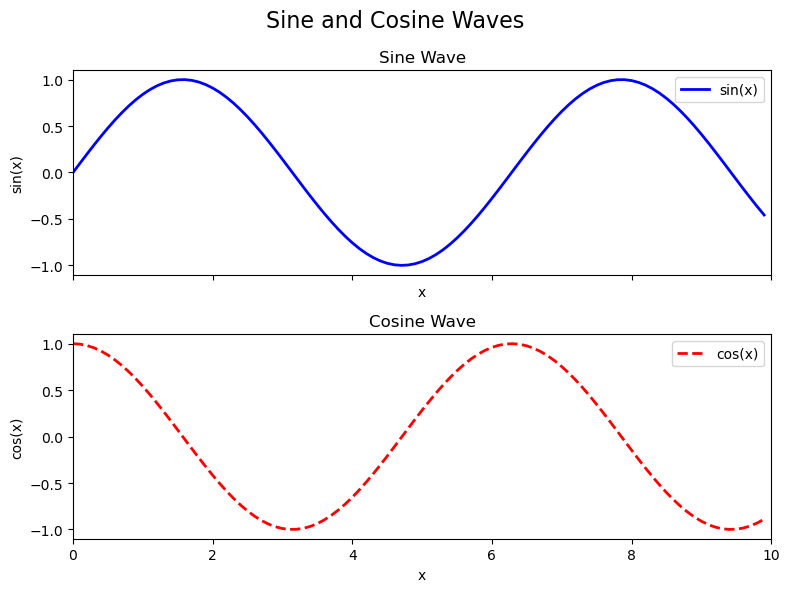

In [66]:
x = np.arange(0, 10, 0.1)
sin_x = np.sin(x)         
cos_x = np.cos(x)          

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True) 

ax1.plot(x, sin_x, label="sin(x)", color="blue", linestyle="-", linewidth=2) 

ax1.set_xlabel("x")
ax1.set_ylabel("sin(x)")
ax1.set_title("Sine Wave")

ax1.set_xlim(0, 10)

ax1.legend()

ax2.plot(x, cos_x, label="cos(x)", color="red", linestyle="--", linewidth=2)

ax2.set_xlabel("x")
ax2.set_ylabel("cos(x)")
ax2.set_title("Cosine Wave")
ax2.legend()

fig.suptitle("Sine and Cosine Waves", fontsize=16)

plt.tight_layout()

plt.show()

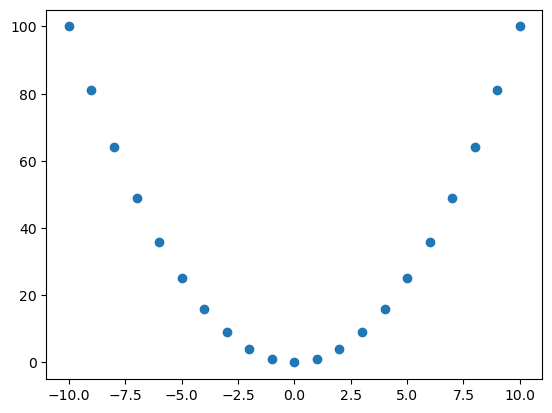

In [67]:
x = np.arange(-10, 11)
y = pow(x, 2)
plt.scatter(x, y)

plt.show()

(array([ 7., 12., 10., 10.,  7., 15.,  2., 12., 17.,  8.]),
 array([  5. , 103.8, 202.6, 301.4, 400.2, 499. , 597.8, 696.6, 795.4,
        894.2, 993. ]),
 <BarContainer object of 10 artists>)

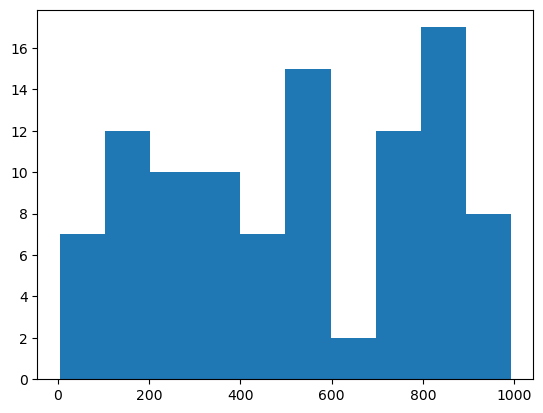

In [68]:
import random
data = random.sample(range(1, 1000), 100)
plt.hist(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc1b496840>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc1b496de0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc18f7ff20>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc1b4973e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc1b4976b0>],
 'means': []}

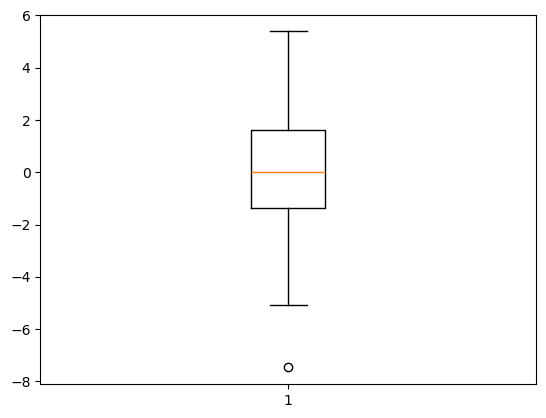

In [69]:
data = [np.random.normal(0, 2, 100)]

plt.boxplot(data)

# Seaborn

In [71]:
import seaborn as sns

In [72]:
data = pd.DataFrame({
    'numerical1': np.random.normal(loc=5, scale=2, size=100),
    'numerical2': np.random.normal(loc=10, scale=3, size=100),
    'categorical1': np.random.choice(['A', 'B', 'C'], size=100),
    'categorical2': np.random.choice(['X', 'Y'], size=100)
})

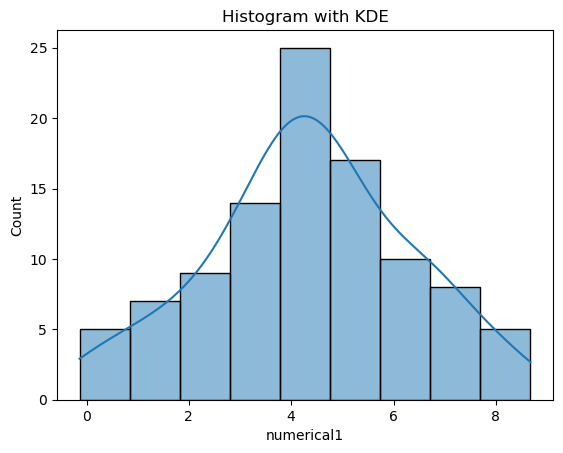

In [73]:
plt.figure()
sns.histplot(data=data, x="numerical1", kde=True)
plt.title("Histogram with KDE")
plt.show()

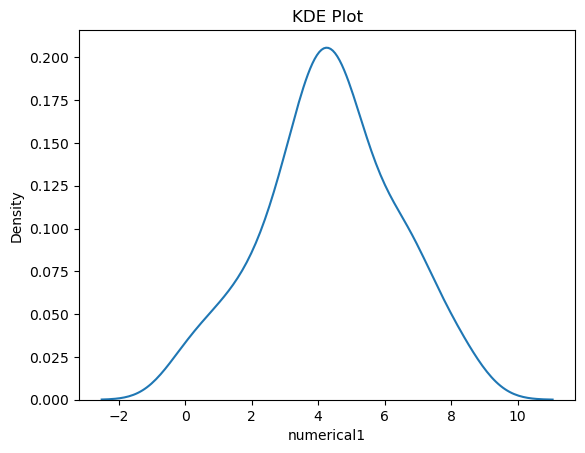

In [74]:
plt.figure()
sns.kdeplot(data=data, x="numerical1")
plt.title("KDE Plot")
plt.show()

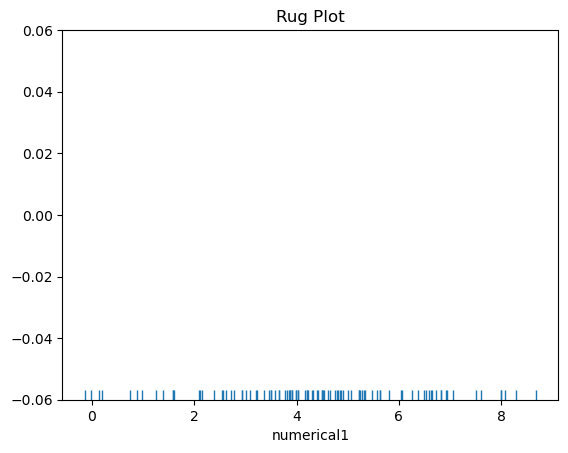

In [75]:
plt.figure()
sns.rugplot(data=data, x="numerical1")
plt.title("Rug Plot")
plt.show()

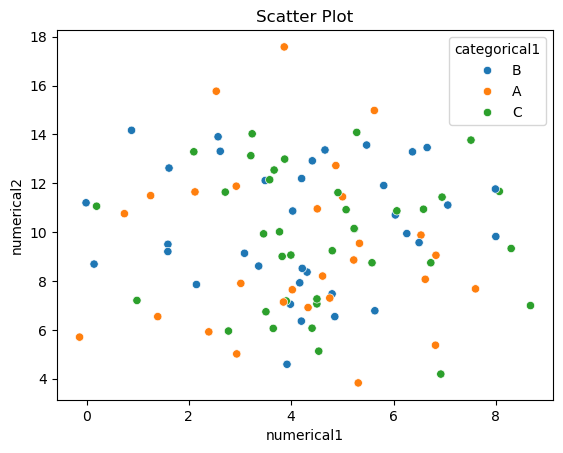

In [76]:
plt.figure()
sns.scatterplot(data=data, x="numerical1", y="numerical2", hue="categorical1")
plt.title("Scatter Plot")
plt.show()

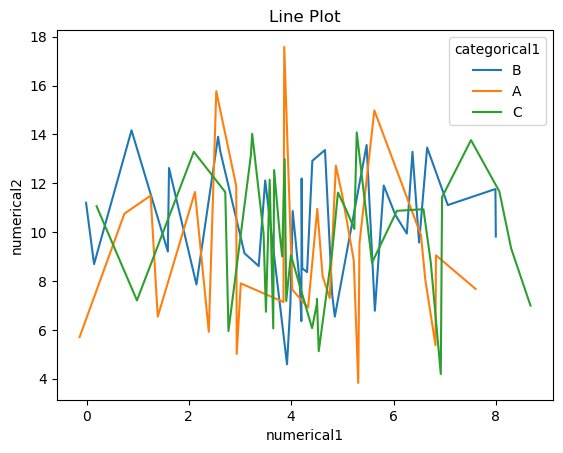

In [77]:
plt.figure()
sns.lineplot(data=data, x="numerical1", y="numerical2", hue="categorical1")
plt.title("Line Plot")
plt.show()

<Figure size 640x480 with 0 Axes>

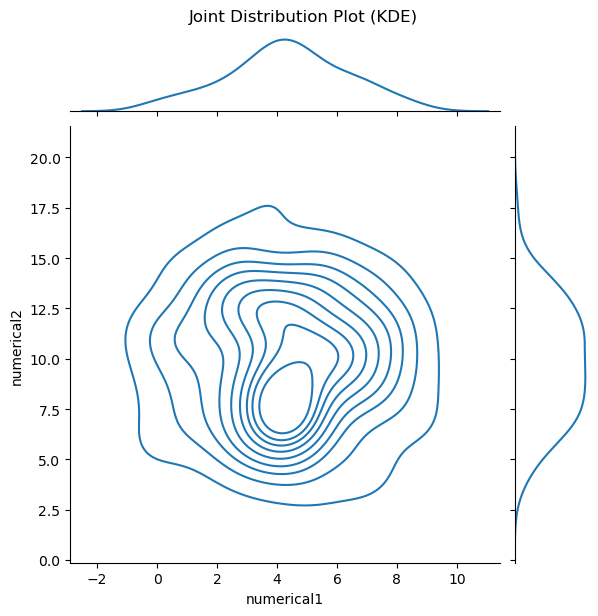

In [78]:
plt.figure()
sns.jointplot(data=data, x="numerical1", y="numerical2", kind="kde")
plt.suptitle("Joint Distribution Plot (KDE)", y=1.02)
plt.show()

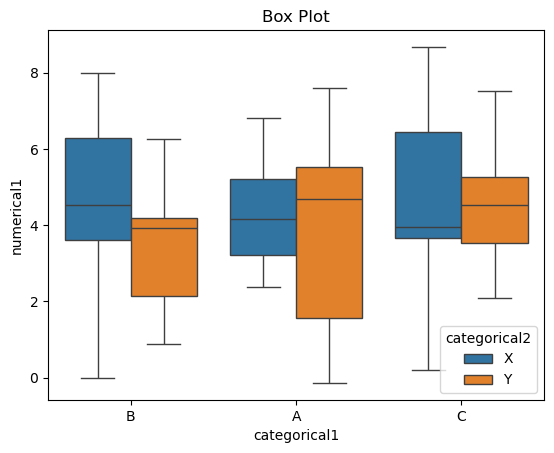

In [79]:
plt.figure()
sns.boxplot(data=data, x="categorical1", y="numerical1", hue="categorical2")
plt.title("Box Plot")
plt.show()

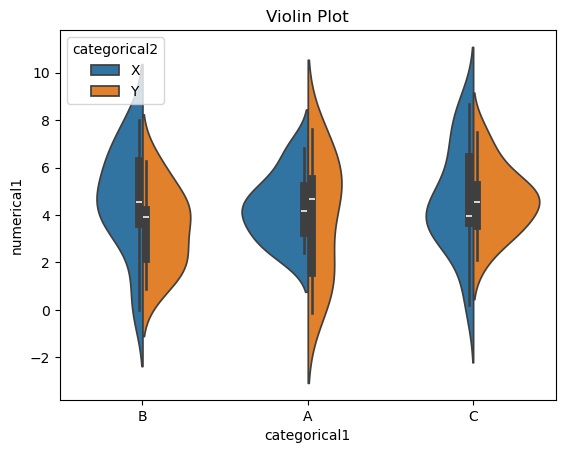

In [80]:
plt.figure()
sns.violinplot(data=data, x="categorical1", y="numerical1", hue="categorical2", split=True)
plt.title("Violin Plot")
plt.show()

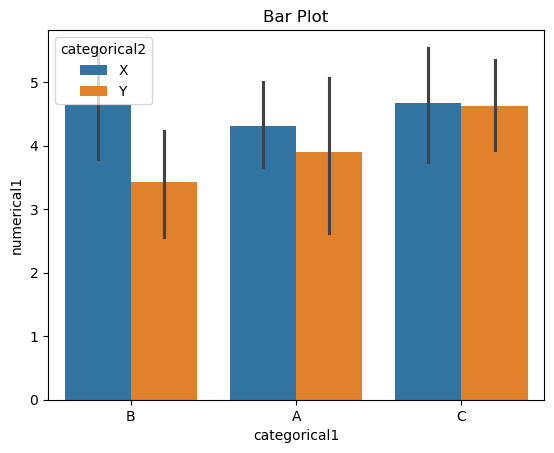

In [81]:
plt.figure()
sns.barplot(data=data, x="categorical1", y="numerical1", hue="categorical2")
plt.title("Bar Plot")
plt.show()

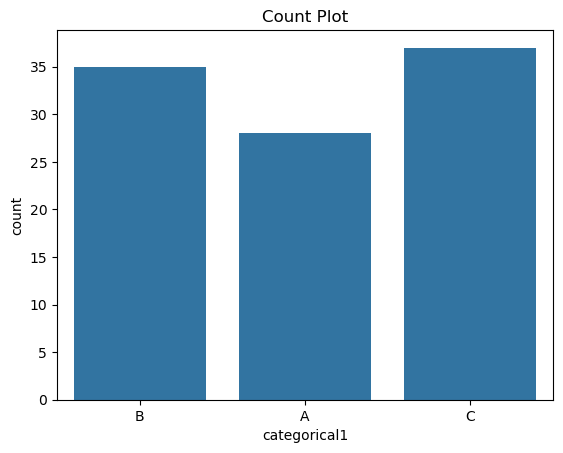

In [82]:
plt.figure()
sns.countplot(data=data, x="categorical1")
plt.title("Count Plot")
plt.show()

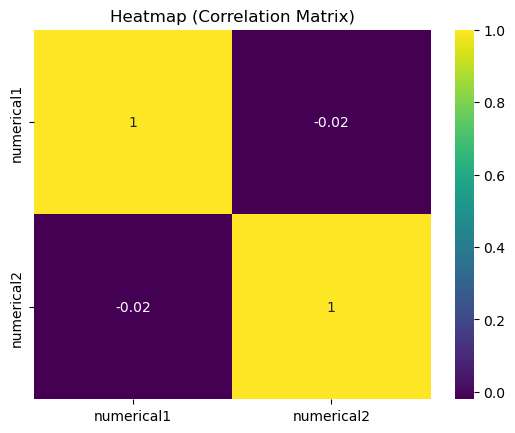

In [83]:
correlation_matrix = data[['numerical1', 'numerical2']].corr()
plt.figure()
sns.heatmap(data=correlation_matrix, annot=True, cmap="viridis")
plt.title("Heatmap (Correlation Matrix)")
plt.show()

<Figure size 640x480 with 0 Axes>

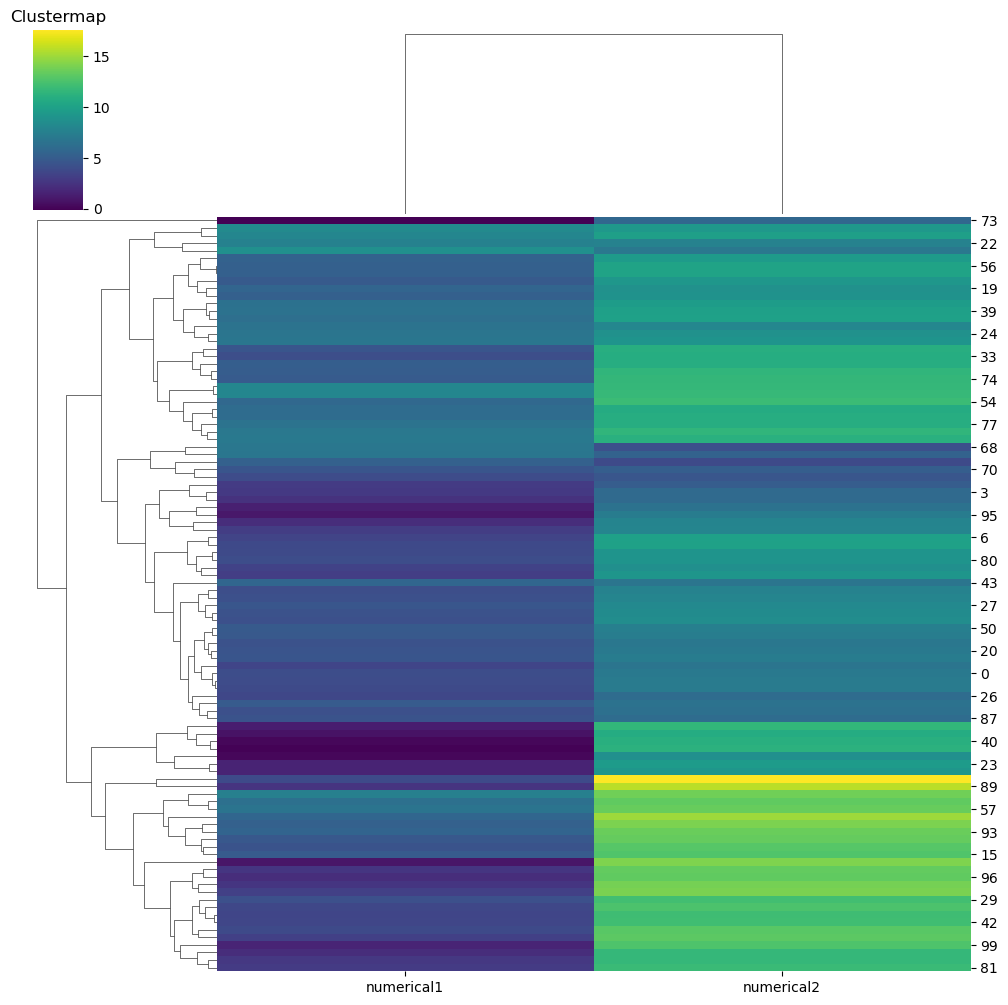

In [84]:
try:
    plt.figure()
    sns.clustermap(data[['numerical1', 'numerical2']], cmap="viridis")
    plt.title("Clustermap")
    plt.show()
except ImportError:
    print("Error")

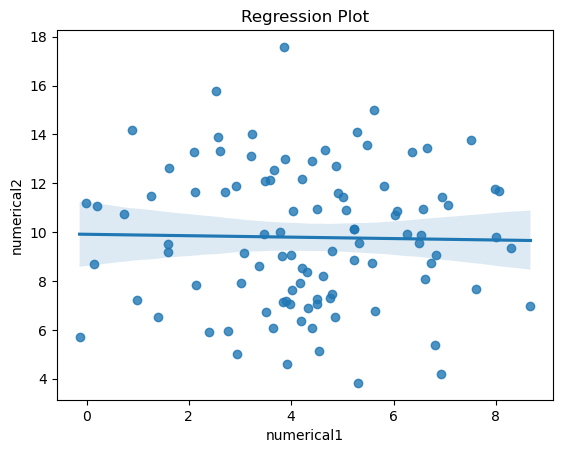

In [85]:
plt.figure()
sns.regplot(data=data, x="numerical1", y="numerical2", scatter=True)
plt.title("Regression Plot")
plt.show()

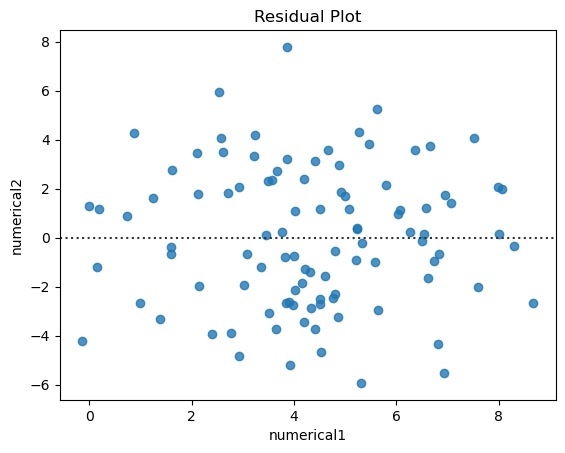

In [86]:
plt.figure()
sns.residplot(data=data, x="numerical1", y="numerical2")
plt.title("Residual Plot")
plt.show()

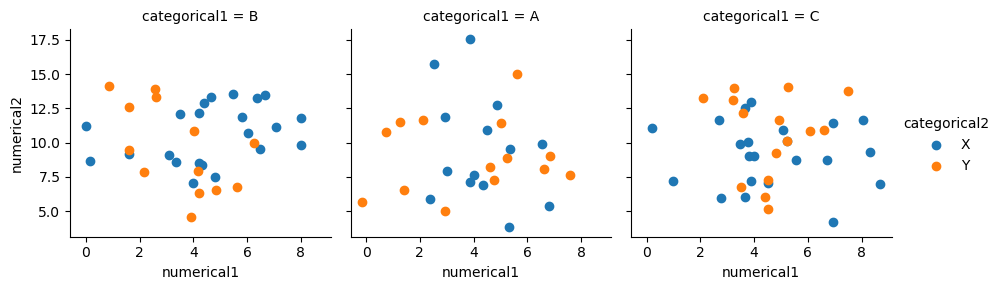

In [87]:
g = sns.FacetGrid(data, col="categorical1", hue="categorical2")
g.map(plt.scatter, "numerical1", "numerical2")
g.add_legend()
plt.show()

<Figure size 640x480 with 0 Axes>

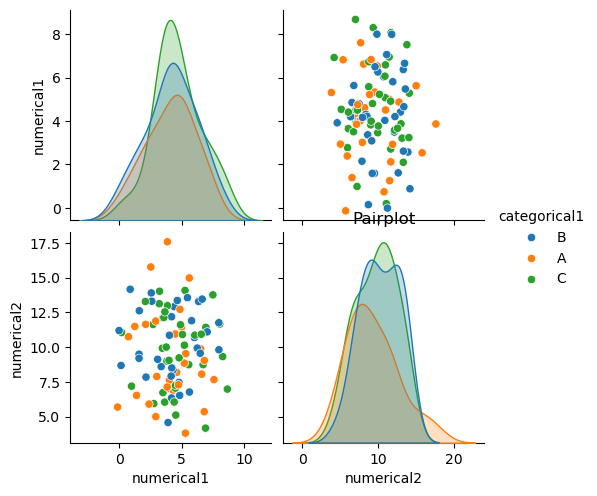

In [88]:
plt.figure()
sns.pairplot(data, hue="categorical1")
plt.title("Pairplot")
plt.show()

# Sickit-Learn

In [90]:
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [91]:
# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor


from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR

from sklearn.naive_bayes import GaussianNB
# As I remember, we also have CategoricalNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [92]:
from sklearn.decomposition import PCA

In [93]:
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Clustering Project

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [96]:
n_samples = 300
n_features = 2
centers = 4
cluster_std = 0.60

X, y = make_blobs(n_samples=n_samples,
                  n_features=n_features,
                  centers=centers,
                  cluster_std=cluster_std
                 )

In [97]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Cluster'] = y 
df.to_csv('artificial_data.csv', index=False)
print("Data saved to artificial_data.csv")

Data saved to artificial_data.csv


In [98]:
df = pd.read_csv('artificial_data.csv')
print("\nData loaded from CSV:")
df.head()


Data loaded from CSV:


,Feature1,Feature2,Cluster
0,8.603829,-0.268275,1
1,-3.212452,6.449357,0
2,8.596055,1.084492,1
3,6.211832,-2.702412,2
4,-7.489978,-0.745235,3


In [99]:
df.describe()

,Feature1,Feature2,Cluster
count,300.000000,300.000000,300.000000
mean,0.709933,1.184084,1.500000
std,6.690539,3.150069,1.119902
min,-9.274036,-3.285302,0.000000
25%,-4.887744,-0.944080,0.750000
50%,1.002092,0.059404,1.500000
75%,6.980004,2.418767,2.250000
max,9.805559,7.577067,3.000000


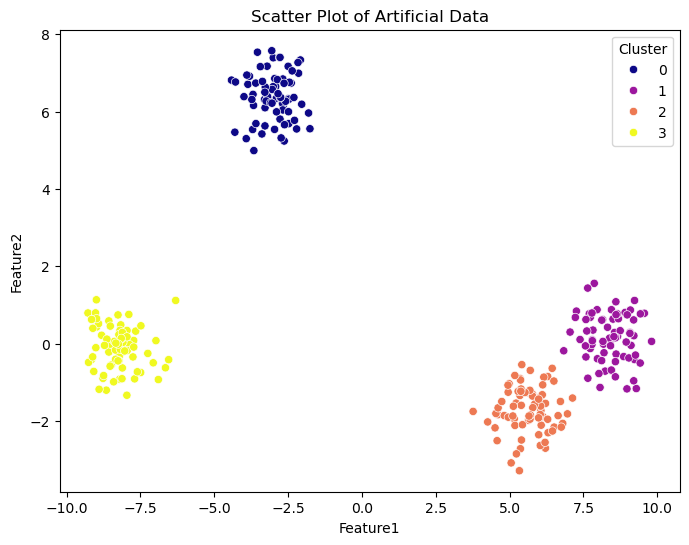

In [100]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', data=df, palette='plasma') # show the "true clusters" if known
plt.title('Scatter Plot of Artificial Data')
plt.show()

In [101]:
model = KMeans(n_clusters=4)

In [102]:
X = df[['Feature1', 'Feature2']]

C:\Users\amirr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


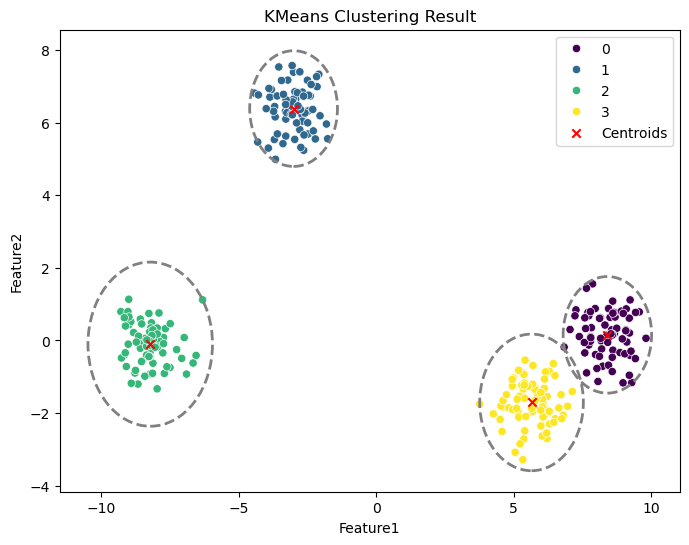

In [103]:
df['KMeans_Cluster'] = model.fit_predict(X)

centroids = model.cluster_centers_

radii = []
for i in range(model.n_clusters):
    cluster_points = df[df['KMeans_Cluster'] == i][['Feature1', 'Feature2']].values
    centroid = centroids[i]
    max_radius = np.max(np.linalg.norm(cluster_points - centroid, axis=1))
    radii.append(max_radius)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='KMeans_Cluster', data=df, palette='viridis')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')

for i in range(model.n_clusters):
    circle = plt.Circle(centroids[i], radii[i], color='gray', fill=False, linestyle='dashed', linewidth=2)
    plt.gca().add_patch(circle)

plt.title('KMeans Clustering Result')
plt.legend()
plt.show()

In [104]:
print("\nCluster Centroids:")
print(model.cluster_centers_)

silhouette_avg = silhouette_score(df[['Feature1', 'Feature2']], df['KMeans_Cluster'])
print(f"\nSilhouette Score for KMeans: {silhouette_avg}")


Cluster Centroids:
[[ 8.40222888  0.15475935]
 [-2.99998474  6.39152517]
 [-8.20878754 -0.10242994]
 [ 5.64627668 -1.70751658]]

Silhouette Score for KMeans: 0.7670833500830221


**Classification Project**

In [106]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [107]:
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [108]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

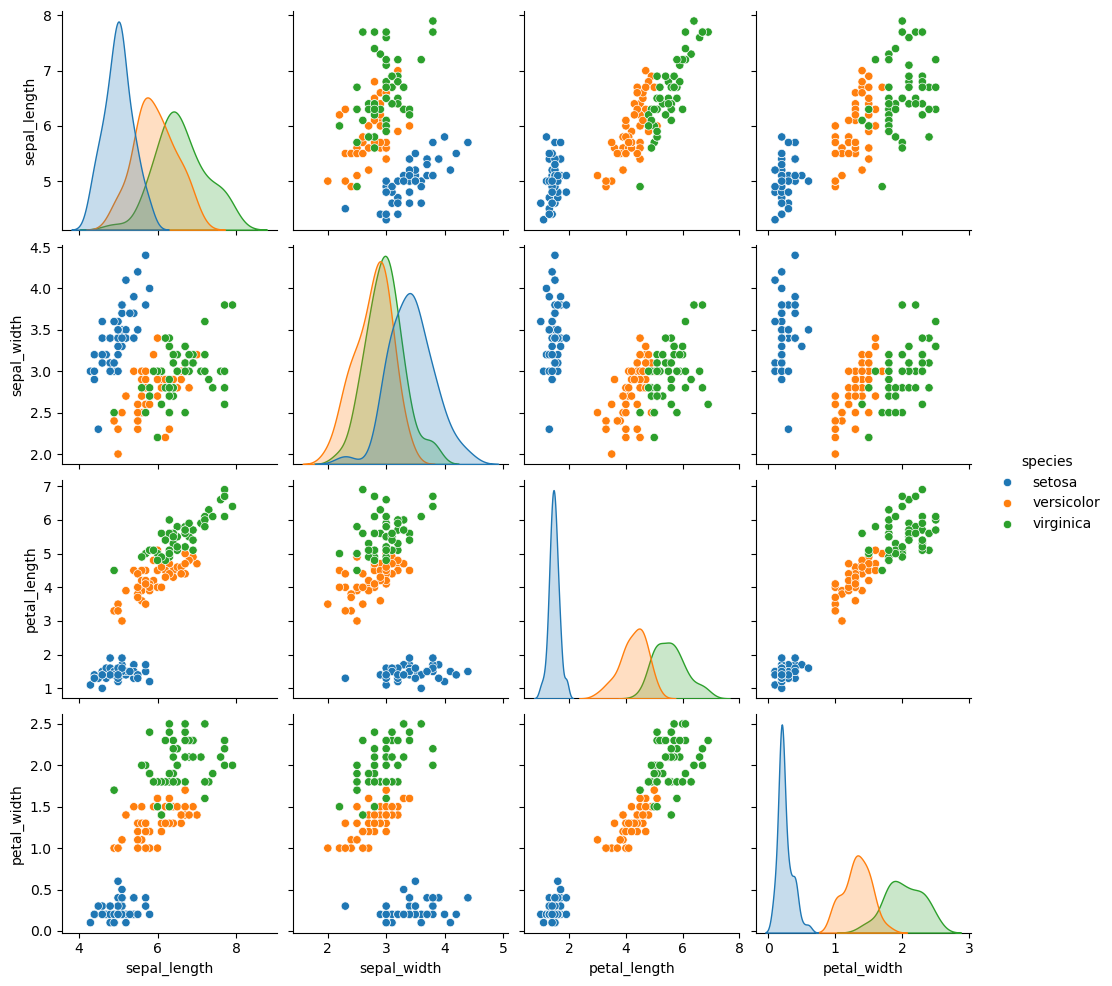

In [109]:
sns.pairplot(iris, hue='species')
plt.show()

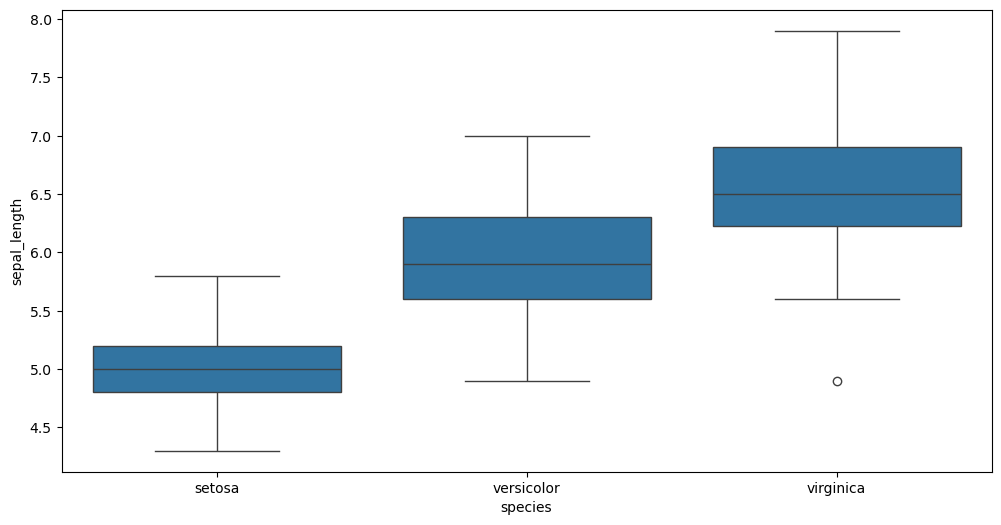

In [110]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris, x='species', y='sepal_length')
plt.show()

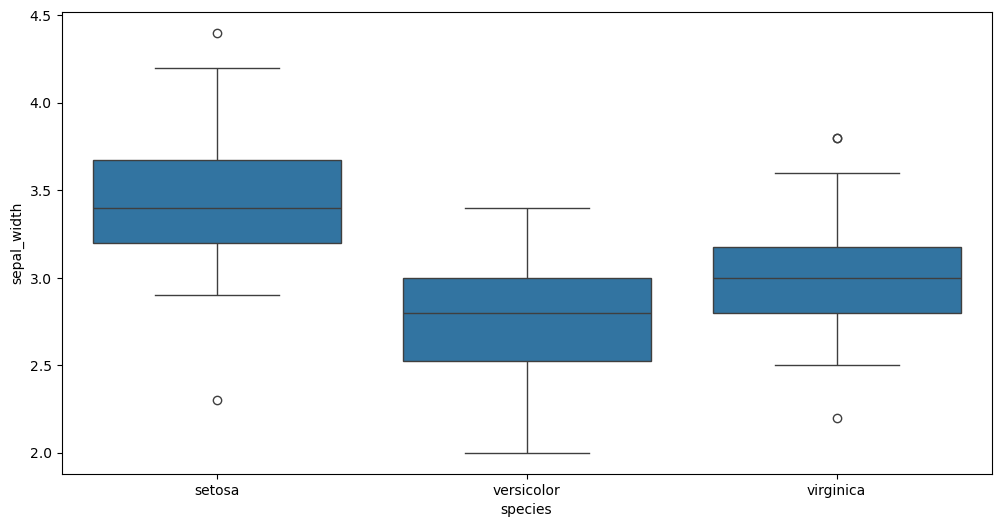

In [111]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris, x='species', y='sepal_width')
plt.show()

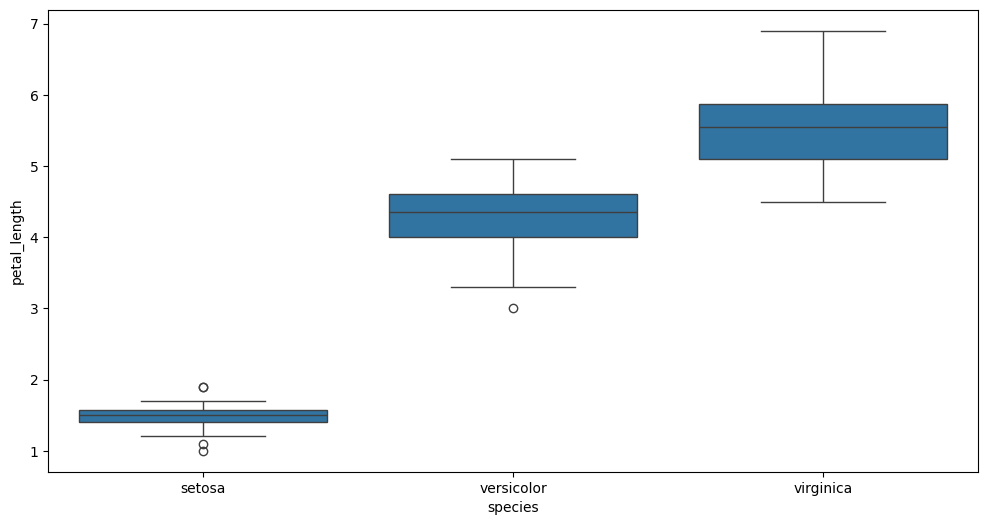

In [112]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris, x='species', y='petal_length')
plt.show()

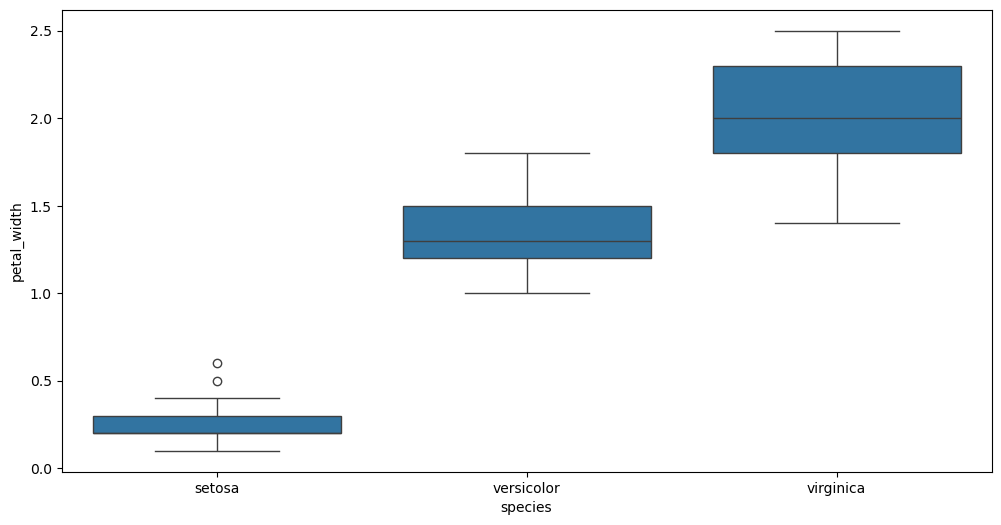

In [113]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris, x='species', y='petal_width')
plt.show()

In [114]:
X = iris.drop('species', axis=1)
y = iris['species']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [116]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [118]:
y_pred = knn.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



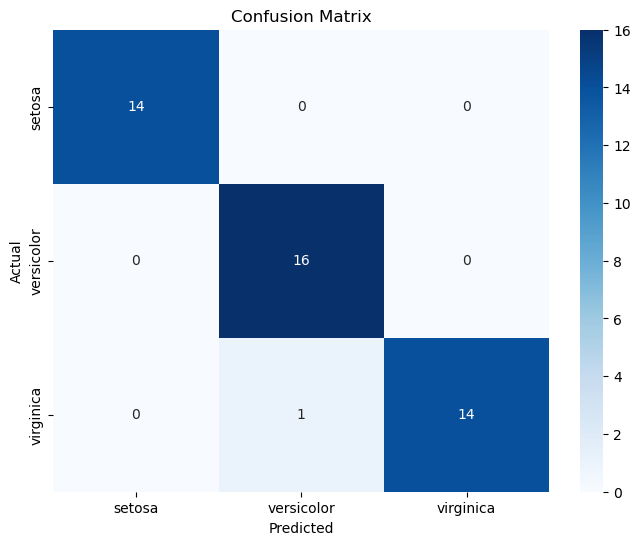

In [119]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris['species'].unique(), yticklabels=iris['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [120]:
test_sample = [[5.1, 3.5, 1.4, 0.2]]
test_sample_scaled = scaler.transform(test_sample)
predicted_species = knn.predict(test_sample_scaled)
print(f"Predicted species for the test sample {test_sample}: {predicted_species[0]}")

Predicted species for the test sample [[5.1, 3.5, 1.4, 0.2]]: setosa


C:\Users\amirr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Exercise: AD Click Classification

**Part1: Data Loading, Cleaning, Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the dataset and store it in a pandas DataFrame


In [ ]:
# take a look at first 5 rows


In [ ]:
# print dataset information


In [ ]:
# print summary of dataset statistics


In [ ]:
# check for missing values


**Part2: Data Visualization**

In [ ]:
# Histogram of 'Daily Internet Usage


In [ ]:
# Jointplot of 'Age' vs 'Area Income'


In [ ]:
# Jointplot of 'Age' vs 'Daily Time Spent on Site' (KDE)


In [ ]:
# Jointplot of 'Daily Time Spent on Site' vs 'Daily Internet Usage'


In [ ]:
# Pairplot with hue='Clicked on Ad'


**Part3: Data Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Define features and label


# Split the data into training and testing sets (80% train, 20% test)


In [ ]:
# The dataset is simple, straight forward and clean so far, leaving not much room for data cleaning and preprocessing

**Part4: Prediction**

In [ ]:
# Train Logistic Regression model on train set


# Make predictions on test set

# Evaluate model (print Classification report )

# Confusion matrix and its heatmap


In [ ]:
# Train Decision Tree model


# Make predictions on test set

# Evaluate model (print Classification report )

# Confusion matrix and its heatmap


In [ ]:
# Train Random Forest model

# Make predictions on test set

# Evaluate model (print Classification report )

# Confusion matrix and its heatmap


In [ ]:
# Train AdaBoost model

# Make predictions on test set

# Evaluate model (print Classification report )

# Confusion matrix and its heatmap


In [ ]:
# Train KNN model

# Make predictions on test set

# Evaluate model (print Classification report )

# Confusion matrix and its heatmap


# Optional
**Part5: Train and evaluate a simple Neural Network model (a 3 layer MLP)<br>**
**You can either use pytorch or tensorflow/keras**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Scale data

# convert the data into torch tensors


# Create TensorDatasets and DataLoaders

# Define MLP class

# Initialize the model, loss function (use nn.BCELoss), and optimizer (you can use optim.Adam)


# Training loop (forward pass and backwared pass)

# Evaluation

# Classification report


# Confusion matrix


# Please send this notebook to my telegram (@Amirreza_MShebly) or you can send an email as well(amirrezamshebly@gmail.com)